# Analysis of wood species loaded in compression parallel to grain 

In [280]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [281]:
## Units definition
inch = 1.0
lbs = 1.0
mm = (1/25.4)*inch
inch2 = inch*inch 

## Definition of dimesions of specimens tested
### Labes, species, and dimensions

In [282]:
Dimensions = {'Label':  ['7-1','7-2','7-3','7-4','8-1','8-2','8-3','8-4','9-1','9-2','9-3','9-4'],
              'Specie': ['DF','DF','DF','DF','P','P','P','P','LVL','LVL','LVL','LVL'],
              'Width':  [42.01,41.91,41.73,42.01,35.98,36.00,35.97,35.98,41.98,41.98,42.17,42.06],
              'Length': [41.93,42.20,42.16,41.91,36.01,35.89,35.89,35.97,42.42,42.45,42.41,42.48]}; 


Dimensions = pd.DataFrame(Dimensions, columns=['Label', 'Specie', 'Width', 'Length'])
Dimensions.Width = Dimensions.Width*mm
Dimensions.Length = Dimensions.Length*mm
Dimensions['Area'] = Dimensions.Width*Dimensions.Length

Dimensions.head(12)


,Label,Specie,Width,Length,Area
0,7-1,DF,1.653937,1.650787,2.730298
1,7-2,DF,1.650000,1.661417,2.741339
2,7-3,DF,1.642913,1.659843,2.726977
3,7-4,DF,1.653937,1.650000,2.728996
4,8-1,P,1.416535,1.417717,2.008246
5,8-2,P,1.417323,1.412992,2.002666
6,8-3,P,1.416142,1.412992,2.000997
7,8-4,P,1.416535,1.416142,2.006015
8,9-1,LVL,1.652756,1.670079,2.760233
9,9-2,LVL,1.652756,1.671260,2.762185


In [283]:
def analyze_stress_strain_data(stress, strain, lower_limit_pct, upper_limit_pct, title):
    """
    Analyzes stress-strain data and plots the stress-strain curve along with the linear elastic region. 
    
    Inputs:
    - stress: numpy array of stress values (psi)
    - strain: numpy array of strain values (dimensionless)
    - lower_limit_pct: float, percentage of maximum stress to be used as lower limit of linear elastic region
    - upper_limit_pct: float, percentage of maximum stress to be used as upper limit of linear elastic region
    - title: string, title of the stress-strain curve plot
    
    Outputs:
    - Prints:
        - Young's modulus (psi)
        - Maximum stress (psi)
        - Strain at max stress
        - Ultimate strain
        - Ultimate strain / Strain at max stress
    - Returns: None
    """
    
    # Find the maximum stress and corresponding strain
    max_stress = np.max(stress)
    max_stress_strain = strain[np.argmax(stress)]
    
    end = np.where(stress > upper_limit_pct*max_stress)[0][0]
    start = np.where(stress > lower_limit_pct*max_stress)[0][0]

    # Fit a line to the data in the linear elastic region
    elastic_strain = strain[start:end]
    elastic_stress = stress[start:end]
    slope, _ = np.polyfit(elastic_strain, elastic_stress, 1)
    
    # Calculate Young's modulus from the slope
    youngs_modulus = round(slope,3)
    
    # Find the strain at max stress
    ultimate_strain = strain[np.argmax(stress)]
    
    # Plot the stress-strain curve and the linear elastic region
    plt.plot(strain, stress)
    plt.plot(elastic_strain, elastic_strain * slope, 'r--')
    plt.plot([max_stress_strain, ultimate_strain], [0, max_stress], 'g--')
    
    # Find the ultimate strain and stress
    ult_strain = strain[len(strain)-1]
    ult_stress = stress[len(stress)-1]
    
    plt.plot( [ult_strain, ult_strain], [0, ult_stress], 'g--')
    plt.xlabel('Strain')
    plt.ylabel('Stress')
    plt.title('Specimen: ' + title)
    plt.grid()
    plt.show()

    # Print out the results
    print(f'Young\'s modulus (psi): {youngs_modulus}')
    print(f'Maximum stress (psi): {round(max_stress,3)}')
    print(f'Strain at max stress: {round(ultimate_strain,6)}')
    print(f'Ultimate strain: {round(ult_strain,6)}')
    print(f'Ultimate strain / Strain at max stress: {round(ult_strain/ultimate_strain,2)}')


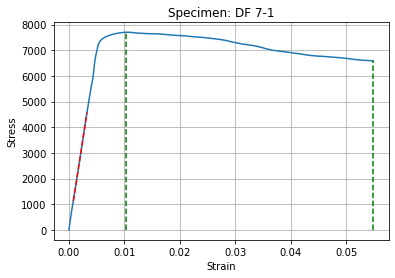

Young's modulus (psi): 1401881.957
Maximum stress (psi): 7698.792
Strain at max stress: 0.010222
Ultimate strain: 0.054833
Ultimate strain / Strain at max stress: 5.36


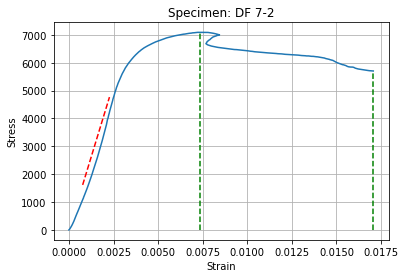

Young's modulus (psi): 2096021.622
Maximum stress (psi): 7091.426
Strain at max stress: 0.007363
Ultimate strain: 0.017064
Ultimate strain / Strain at max stress: 2.32


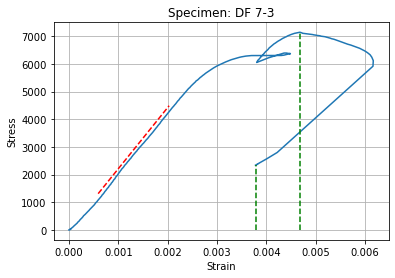

Young's modulus (psi): 2211135.91
Maximum stress (psi): 7147.107
Strain at max stress: 0.004681
Ultimate strain: 0.003781
Ultimate strain / Strain at max stress: 0.81


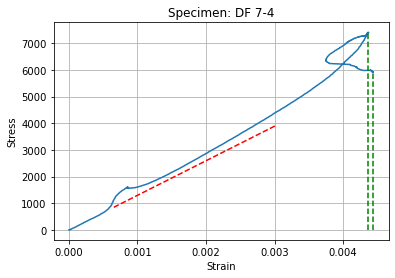

Young's modulus (psi): 1297432.438
Maximum stress (psi): 7412.982
Strain at max stress: 0.004368
Ultimate strain: 0.004436
Ultimate strain / Strain at max stress: 1.02


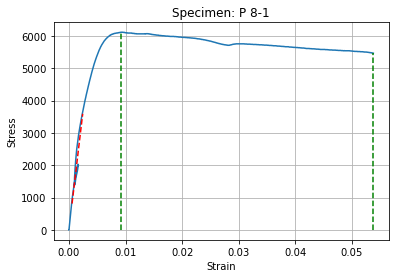

Young's modulus (psi): 1476679.056
Maximum stress (psi): 6114.79
Strain at max stress: 0.009178
Ultimate strain: 0.053749
Ultimate strain / Strain at max stress: 5.86


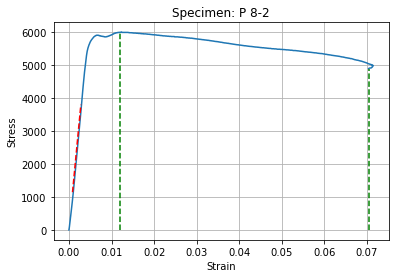

Young's modulus (psi): 1351388.814
Maximum stress (psi): 5987.019
Strain at max stress: 0.012008
Ultimate strain: 0.070392
Ultimate strain / Strain at max stress: 5.86


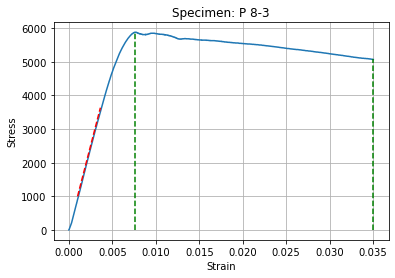

Young's modulus (psi): 1003606.636
Maximum stress (psi): 5882.067
Strain at max stress: 0.007581
Ultimate strain: 0.03502
Ultimate strain / Strain at max stress: 4.62


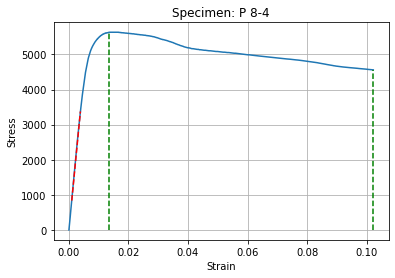

Young's modulus (psi): 874012.566
Maximum stress (psi): 5633.059
Strain at max stress: 0.013603
Ultimate strain: 0.102222
Ultimate strain / Strain at max stress: 7.51


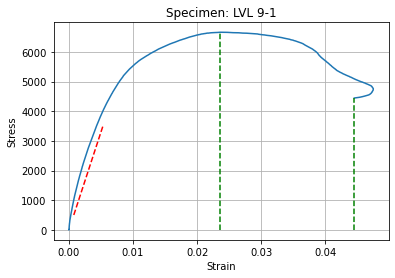

Young's modulus (psi): 659669.902
Maximum stress (psi): 6662.482
Strain at max stress: 0.023594
Ultimate strain: 0.04452
Ultimate strain / Strain at max stress: 1.89


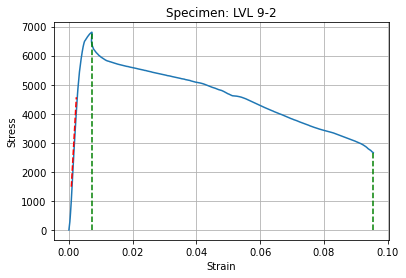

Young's modulus (psi): 1958465.809
Maximum stress (psi): 6806.207
Strain at max stress: 0.007083
Ultimate strain: 0.095471
Ultimate strain / Strain at max stress: 13.48


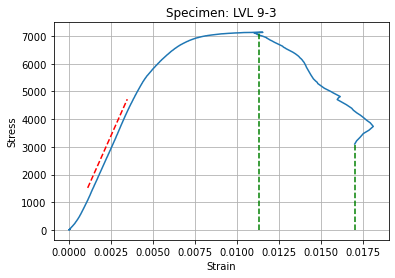

Young's modulus (psi): 1358743.368
Maximum stress (psi): 7139.065
Strain at max stress: 0.011316
Ultimate strain: 0.017014
Ultimate strain / Strain at max stress: 1.5


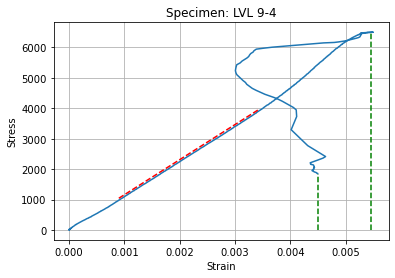

Young's modulus (psi): 1154232.409
Maximum stress (psi): 6499.593
Strain at max stress: 0.005453
Ultimate strain: 0.004495
Ultimate strain / Strain at max stress: 0.82


In [287]:
for name in Dimensions.Label:
    specie = Dimensions.loc[Dimensions.Label== name,'Specie'].iloc[0]
    
    # Import Excel file as a Pandas dataframe
    data = pd.read_excel('data/' + specie +'_' + name + '.xlsx')
    data = data.rename(columns={'Time (sec)':'Time',
                                  'Extension (in)':'Extension',
                                  'Load (lbf)':'Load',
                                  'Strain (%)':'Strain'})

    data['Stress'] = data.Load/Dimensions.loc[Dimensions.Label== name,'Area'].iloc[0]
    data.Stress = -1*data.Stress
    data.Strain = -1*(1/100)*data.Strain
    stress = data.Stress.to_numpy()
    strain = data.Strain.to_numpy()
    analyze_stress_strain_data(stress, strain, lower_limit_pct=0.15, upper_limit_pct=0.6,title= specie + ' ' + name)
